<a href="https://colab.research.google.com/github/chayvw18/Master-Statistics-ML/blob/main/wine_quality_ttest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/MP

/content/drive/MyDrive/MP


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

data = pd.read_csv(url, sep=';') #not comma seperated
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data.keys() #all the colum variables in the data set

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
len(np.unique(data['alcohol']))

65

In [7]:
#print a list of unique values per feature

for i in data.keys():
  print(f"Column {i} has {len(np.unique(data[i]))} unique values")

Column fixed acidity has 96 unique values
Column volatile acidity has 143 unique values
Column citric acid has 80 unique values
Column residual sugar has 91 unique values
Column chlorides has 153 unique values
Column free sulfur dioxide has 60 unique values
Column total sulfur dioxide has 144 unique values
Column density has 436 unique values
Column pH has 89 unique values
Column sulphates has 96 unique values
Column alcohol has 65 unique values
Column quality has 6 unique values


<ipython-input-8-7d0e462bb5d4>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45) #ax.get_xticklabels() gets label named


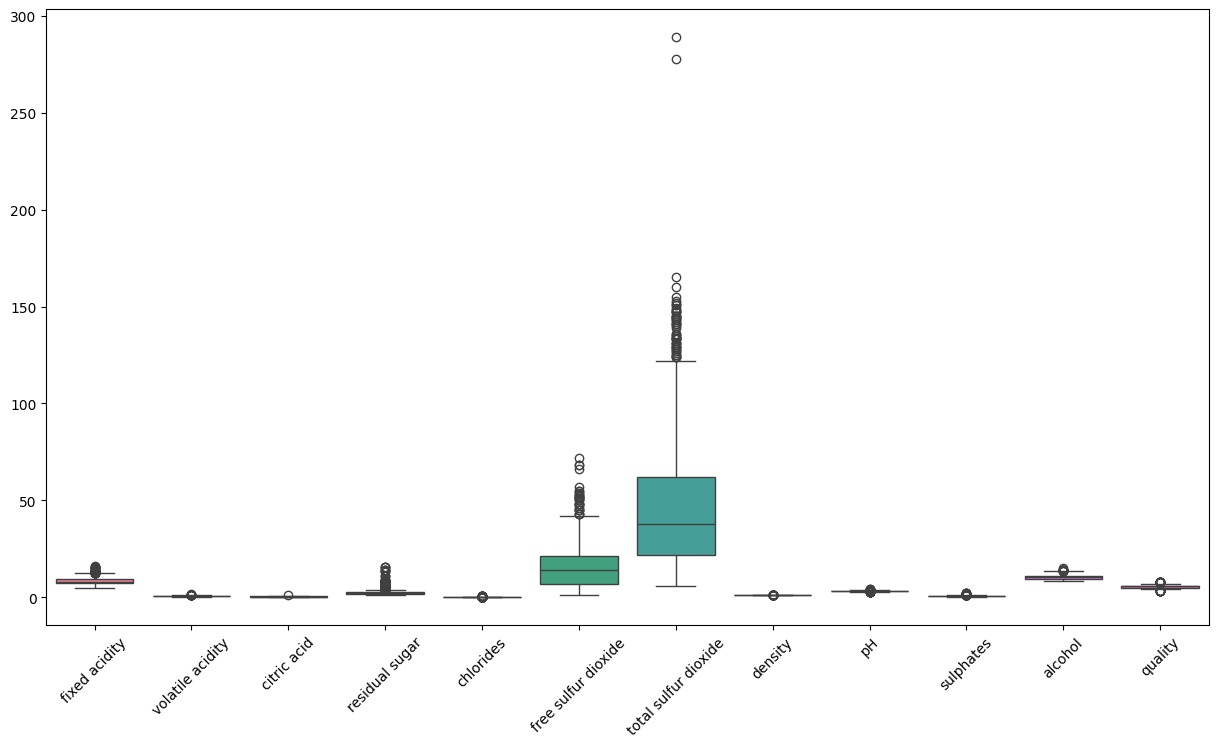

In [8]:
#box plot , will need to expand the figsize

fig, ax = plt.subplots(1, figsize=(15, 8))

ax = sns.boxplot(data=data)
#rotate labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45) #ax.get_xticklabels() gets label named
plt.show()

In [9]:
data = data[data['total sulfur dioxide'] < 200] #removed outliers

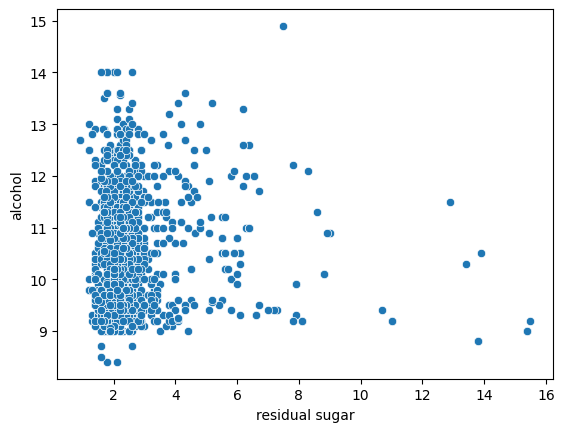

In [10]:
#visual data exploration
sns.scatterplot(x = data['residual sugar'], y=data['alcohol'])
plt.show()

In [11]:
data.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

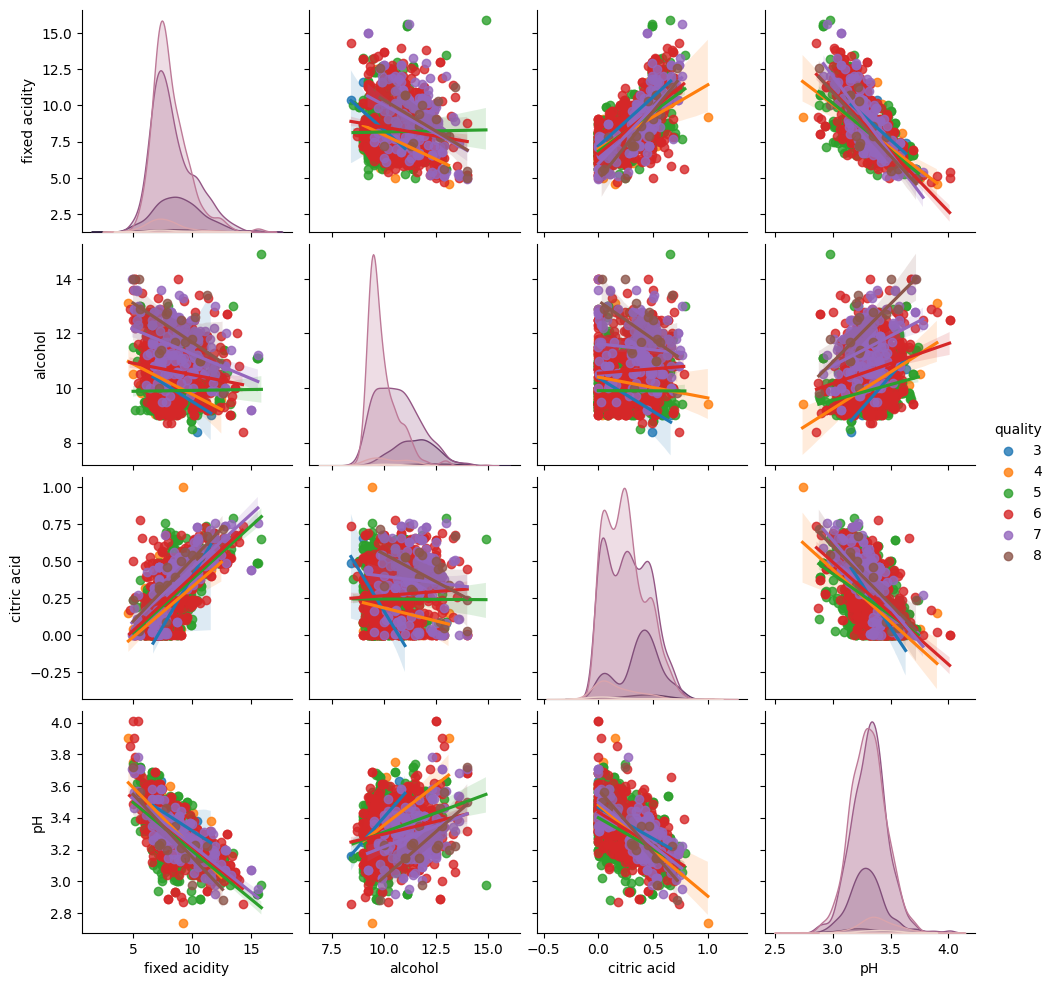

In [12]:
cols_to_plot = ['fixed acidity','alcohol', 'citric acid', 'pH', 'quality']
sns.pairplot(data[cols_to_plot], kind='reg', hue='quality')

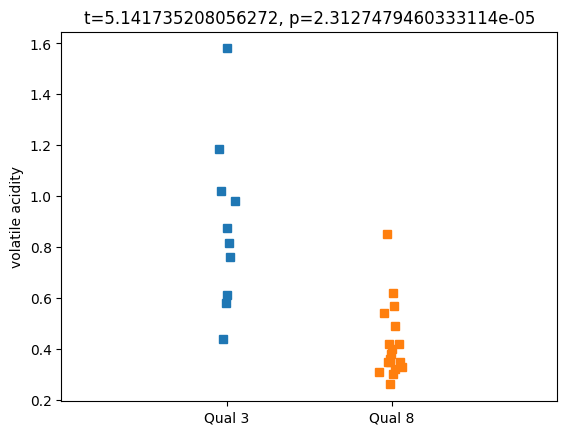

In [32]:
#extract data where acidic values are more than three

x = data['volatile acidity'][data['quality']==3]
y = data['volatile acidity'][data['quality']==8]


#ttest
stat, p = stats.ttest_ind(x, y)

plt.plot(np.random.randn(len(x))/30, x, 's',
         np.random.randn(len(y))/30 + 1, y, 's')

plt.xlim([-1, 2])
plt.xticks([0, 1], labels=['Qual 3', 'Qual 8'])
plt.ylabel('volatile acidity')
plt.title(f't={stat}, p={p}')
plt.show()

<BarContainer object of 6 artists>

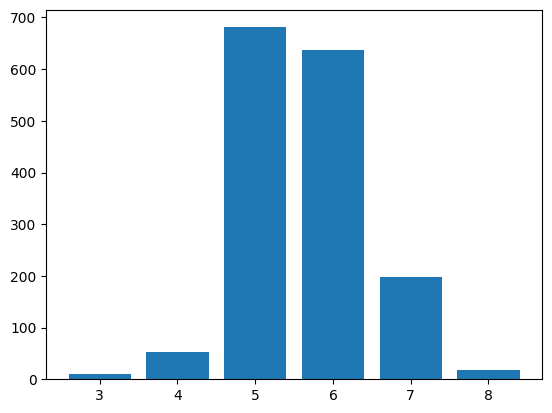

In [36]:
#plot histogram to how many times each metric appears

qualcounts = np.zeros(6)

n = 0
for i in range(3,9):
  qualcounts[n] = len(data[data['quality']==i])
  n += 1

plt.bar(range(3,9), qualcounts)

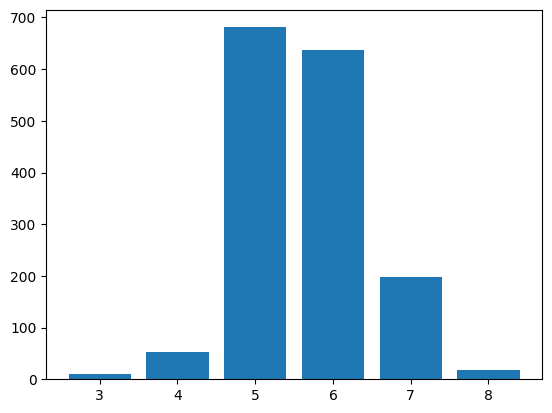

In [39]:
counts = data['quality'].value_counts()

# counts #plot the quailty on the x and the count on the y
plt.bar(list(counts.keys()), counts)
plt.show()

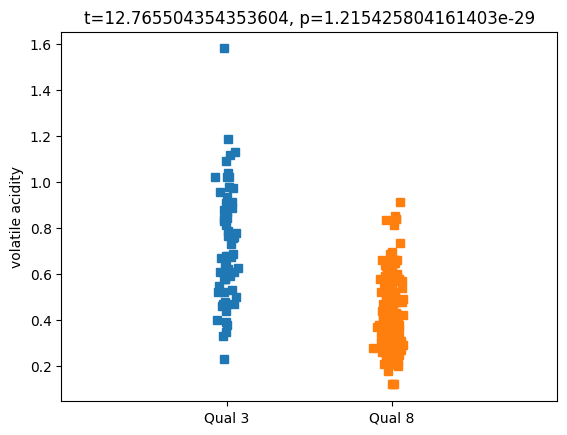

In [45]:
x = data['volatile acidity'][(data['quality']==3) |(data['quality']==4)]
y = data['volatile acidity'] [(data['quality']==7) |(data['quality']==8)]

#ttest
stat, p = stats.ttest_ind(x, y)

plt.plot(np.random.randn(len(x))/30, x, 's',
         np.random.randn(len(y))/30 + 1, y, 's')

plt.xlim([-1, 2])
plt.xticks([0, 1], labels=['Qual 3', 'Qual 8'])
plt.ylabel('volatile acidity')
plt.title(f't={stat}, p={p}')
plt.show()